<a href="https://colab.research.google.com/github/k-chanez/Churn-prediction/blob/dev_amel/Churn_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install openpyxl


In [3]:
pip install tabulate


In [4]:
pip install matplotlib


In [5]:
pip install seaborn

In [6]:
pip install scikit-learn


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

Load data

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
# Chemin vers le fichier Excel sur Google Drive
chemin_fichier = '/content/drive/MyDrive/E Commerce Dataset.xlsx'

# Charger le fichier Excel dans un DataFrame pandas
df = pd.read_excel(chemin_fichier)

In [34]:
# Aperçu des données
print("Aperçu des données :")
print(df.head())

Aperçu des données :
   CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore 

In [35]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [36]:
df.shape

(5630, 20)

In [37]:
df.columns.values

array(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice',
       'CityTier', 'WarehouseToHome', 'PreferredPaymentMode', 'Gender',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferedOrderCat',
       'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed',
       'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'], dtype=object)

In [38]:
# Informations sur le dataframe
print("\nInformations sur le dataframe :")
print(df.info())


Informations sur le dataframe :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null 

In [39]:
# Statistiques descriptives
print("\nStatistiques descriptives :")
df.describe()


Statistiques descriptives :


,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


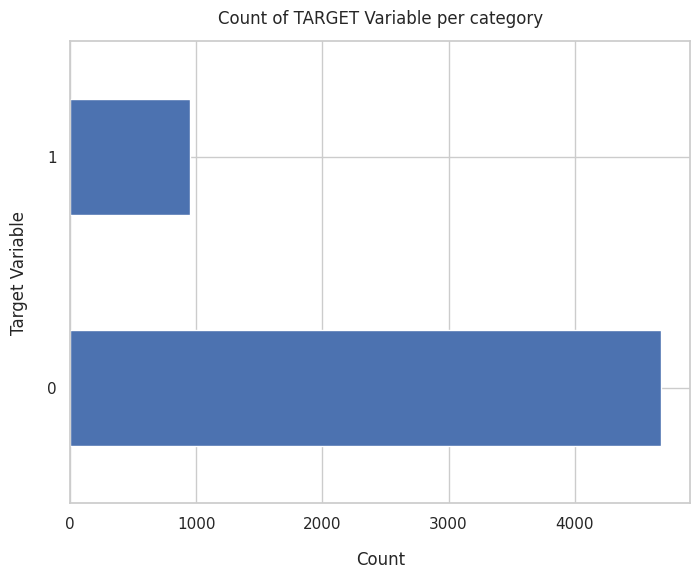

In [40]:
df['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [41]:
100*df['Churn'].value_counts()/len(df['Churn'])

0    83.161634
1    16.838366
Name: Churn, dtype: float64

In [42]:
df['Churn'].value_counts()

0    4682
1     948
Name: Churn, dtype: int64

Data is highly imbalanced, ratio = 83.16

In [44]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

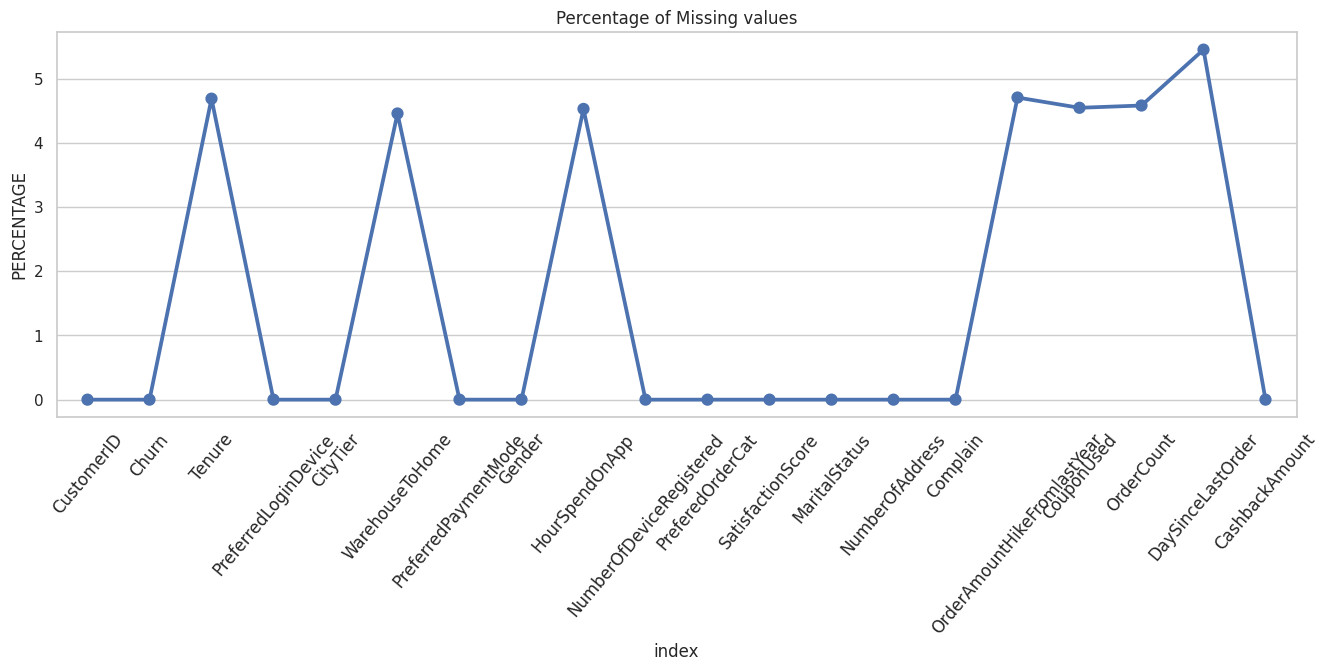

In [46]:
import seaborn as sns

# Assuming 'df' is your DataFrame
missing = pd.DataFrame((df.isnull().sum()) * 100 / df.shape[0]).reset_index()
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='index', y=0, data=missing)  # Specify x and y variables
plt.xticks(rotation=50, fontsize=12)  # Adjust the rotation and font size for better readability
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [47]:

# Vérification des valeurs manquantes
print("\nValeurs manquantes :")
print(df.isnull().sum())


Valeurs manquantes :
CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


In [48]:
#pourcentage des vall manquantes
round((df.isnull().sum()*100 / df.shape[0]),2)

CustomerID                     0.00
Churn                          0.00
Tenure                         4.69
PreferredLoginDevice           0.00
CityTier                       0.00
WarehouseToHome                4.46
PreferredPaymentMode           0.00
Gender                         0.00
HourSpendOnApp                 4.53
NumberOfDeviceRegistered       0.00
PreferedOrderCat               0.00
SatisfactionScore              0.00
MaritalStatus                  0.00
NumberOfAddress                0.00
Complain                       0.00
OrderAmountHikeFromlastYear    4.71
CouponUsed                     4.55
OrderCount                     4.58
DaySinceLastOrder              5.45
CashbackAmount                 0.00
dtype: float64

Le pourcentage des valeurs manquantes le plus grand ne depasse pas 6%

In [49]:
# supprimer la colonne ID qui n'apporte aucune info ( val distinct = len(df))
df.drop('CustomerID' , axis = 1 , inplace = True)

In [50]:
# Vérifier les valeurs manquantes par colonne
missing_values = df.isnull().sum()


In [51]:
# Afficher les colonnes avec des valeurs manquantes (si applicable)
missing_columns = missing_values[missing_values > 0]
if not missing_columns.empty:
    print("Colonnes avec des valeurs manquantes :")
    print(missing_columns)
else:
    print("Aucune valeur manquante dans le dataframe.")

Colonnes avec des valeurs manquantes :
Tenure                         264
WarehouseToHome                251
HourSpendOnApp                 255
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
dtype: int64


In [53]:
# Calculer le pourcentage de valeurs manquantes par colonne
percentage_missing = (df.isnull().sum() / len(df)) * 100

# Créer un dataframe pour afficher les résultats
missing_data = pd.DataFrame({'Total Missing Values': df.isnull().sum(), 'Percentage Missing': percentage_missing})

In [54]:
# Afficher le dataframe des valeurs manquantes (si applicable)
if not missing_data[missing_data['Total Missing Values'] > 0].empty:
    print("Pourcentage de valeurs manquantes par colonne :")
    print(missing_data[missing_data['Total Missing Values'] > 0])
else:
    print("Aucune valeur manquante dans le dataframe.")

Pourcentage de valeurs manquantes par colonne :
                             Total Missing Values  Percentage Missing
Tenure                                        264            4.689165
WarehouseToHome                               251            4.458259
HourSpendOnApp                                255            4.529307
OrderAmountHikeFromlastYear                   265            4.706927
CouponUsed                                    256            4.547069
OrderCount                                    258            4.582593
DaySinceLastOrder                             307            5.452931


Data exploration

Plot distibution of individual predictors by churn

Univariate Analysis

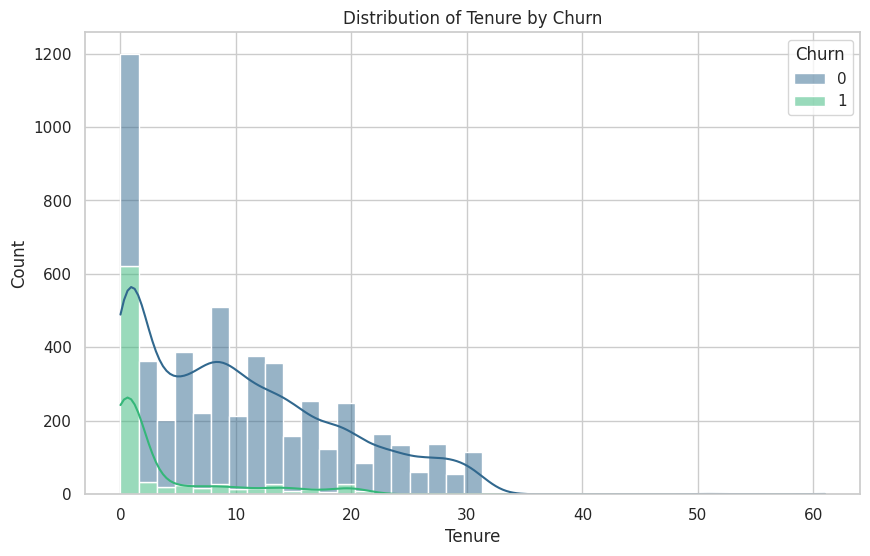

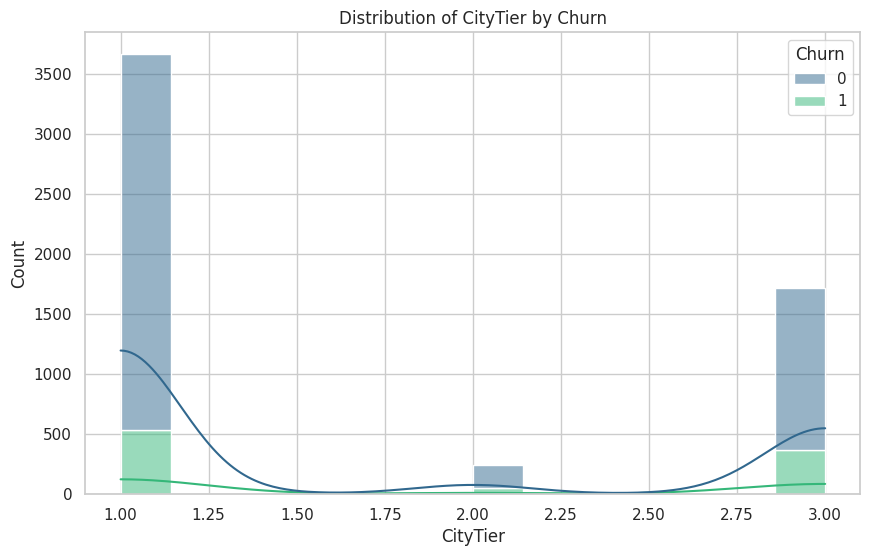

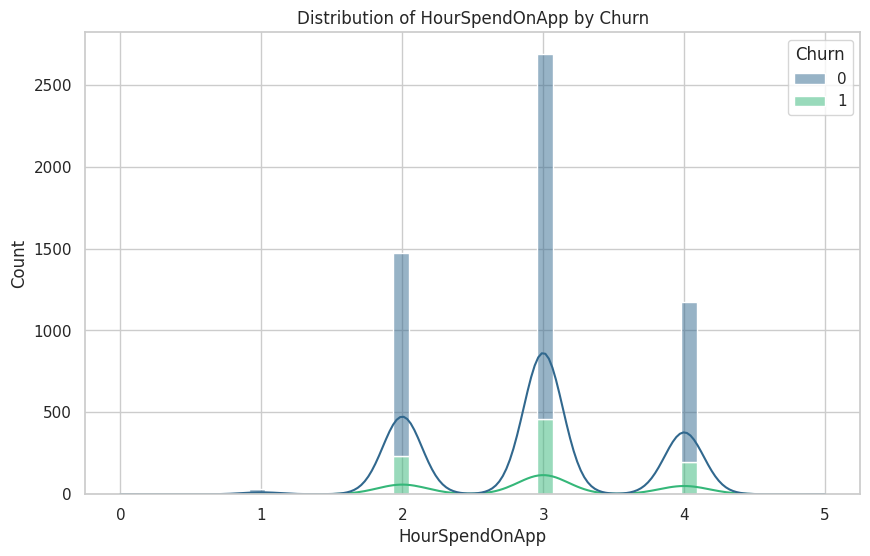

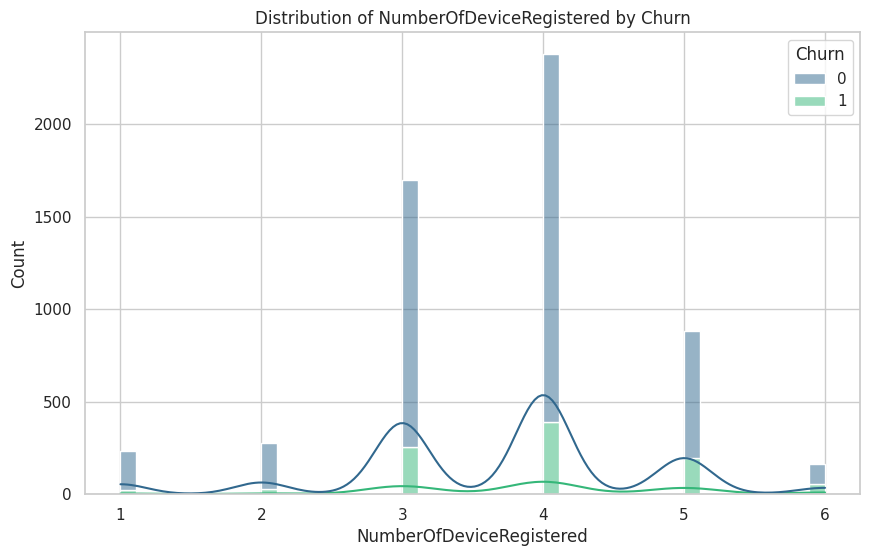

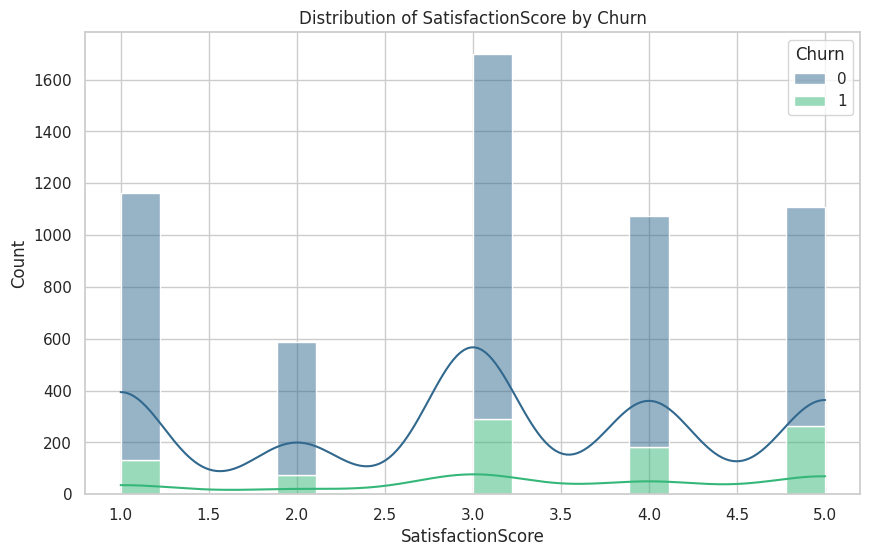

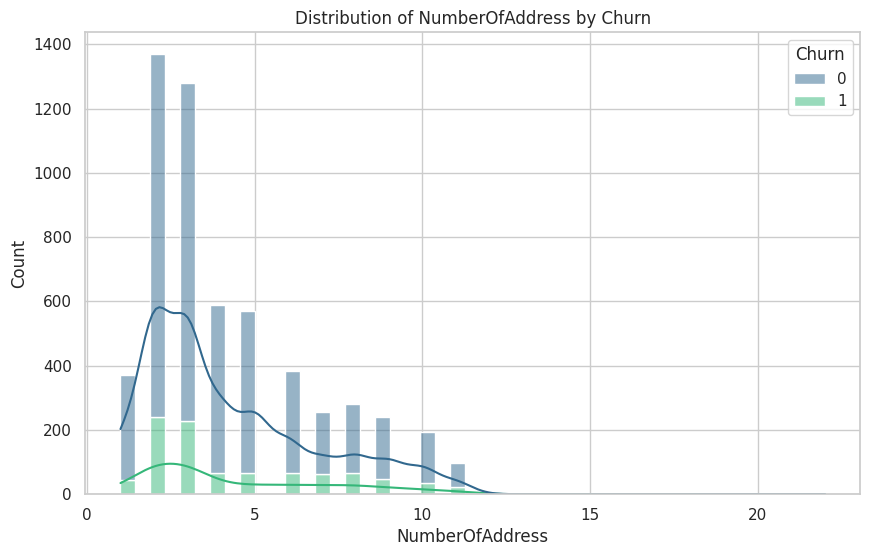

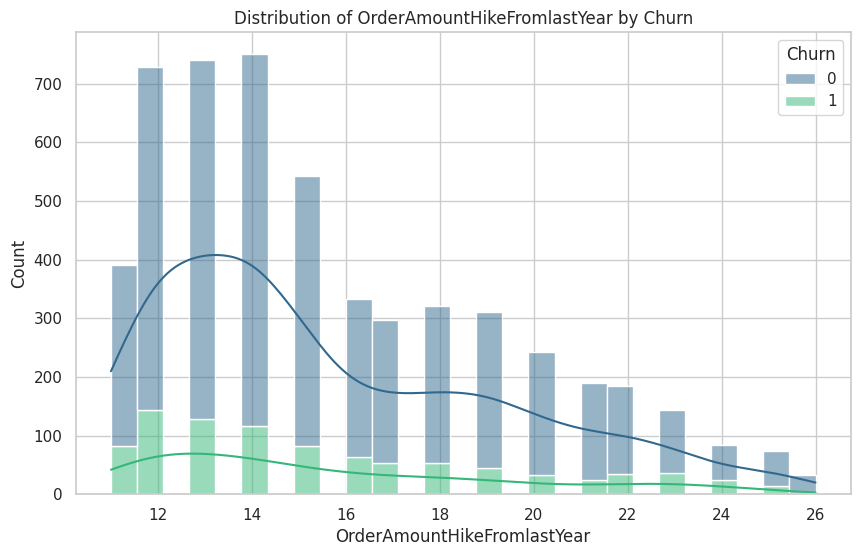

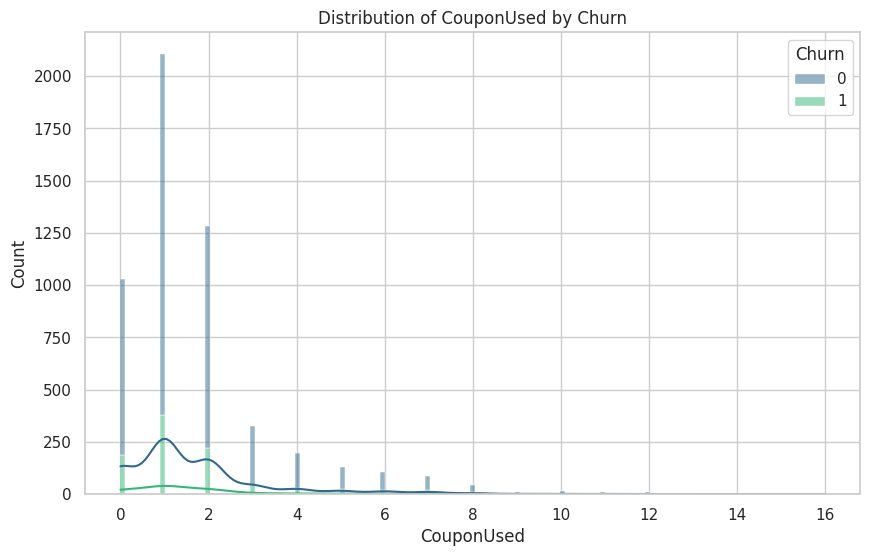

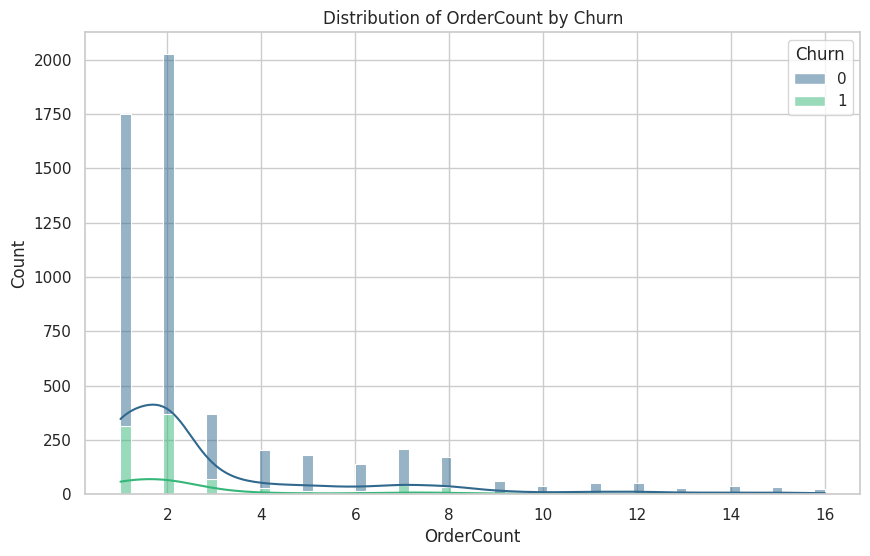

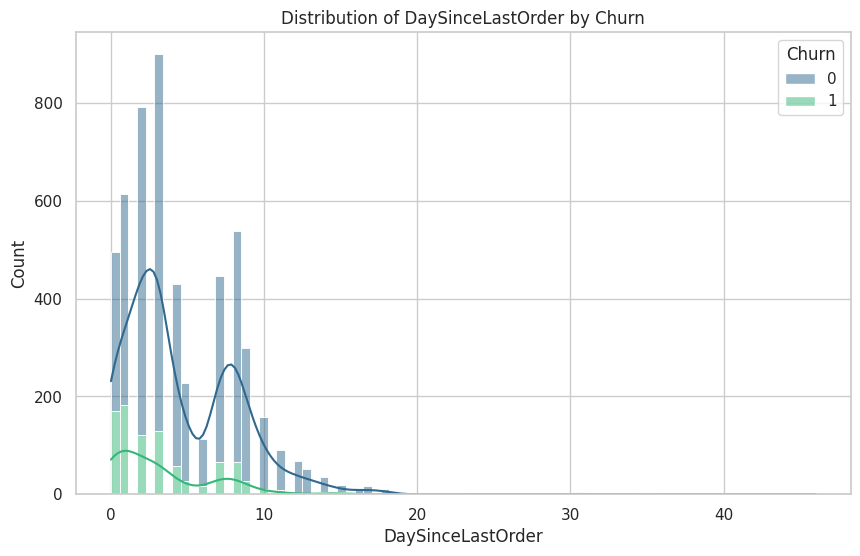

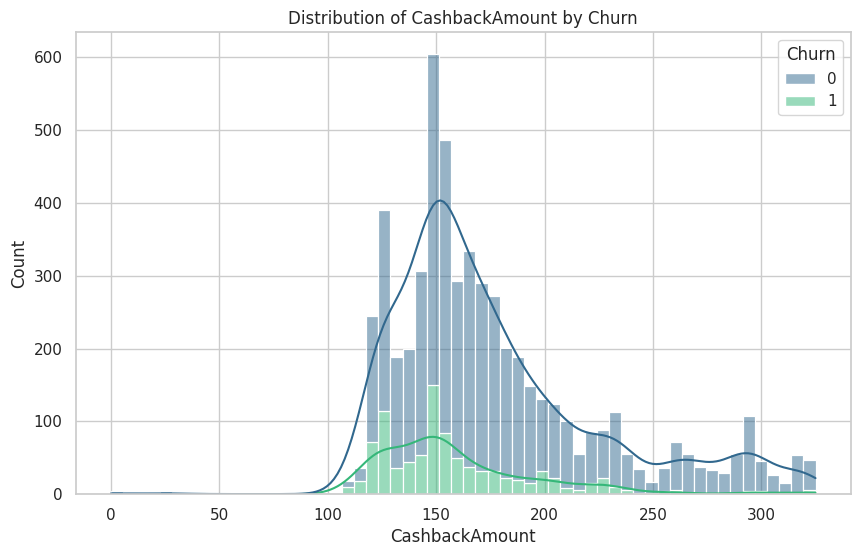

In [55]:
# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# List of predictors to visualize
predictors = ['Tenure', 'CityTier', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

# Iterate through predictors and plot the distribution by Churn
for predictor in predictors:
    plt.figure(figsize=(10, 6))
    sns.histplot(df, x=predictor, hue='Churn', multiple="stack", kde=True, palette="viridis")
    plt.title(f'Distribution of {predictor} by Churn')
    plt.xlabel(predictor)
    plt.ylabel('Count')
    plt.show()

<ipython-input-56-21c32d9d6557>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


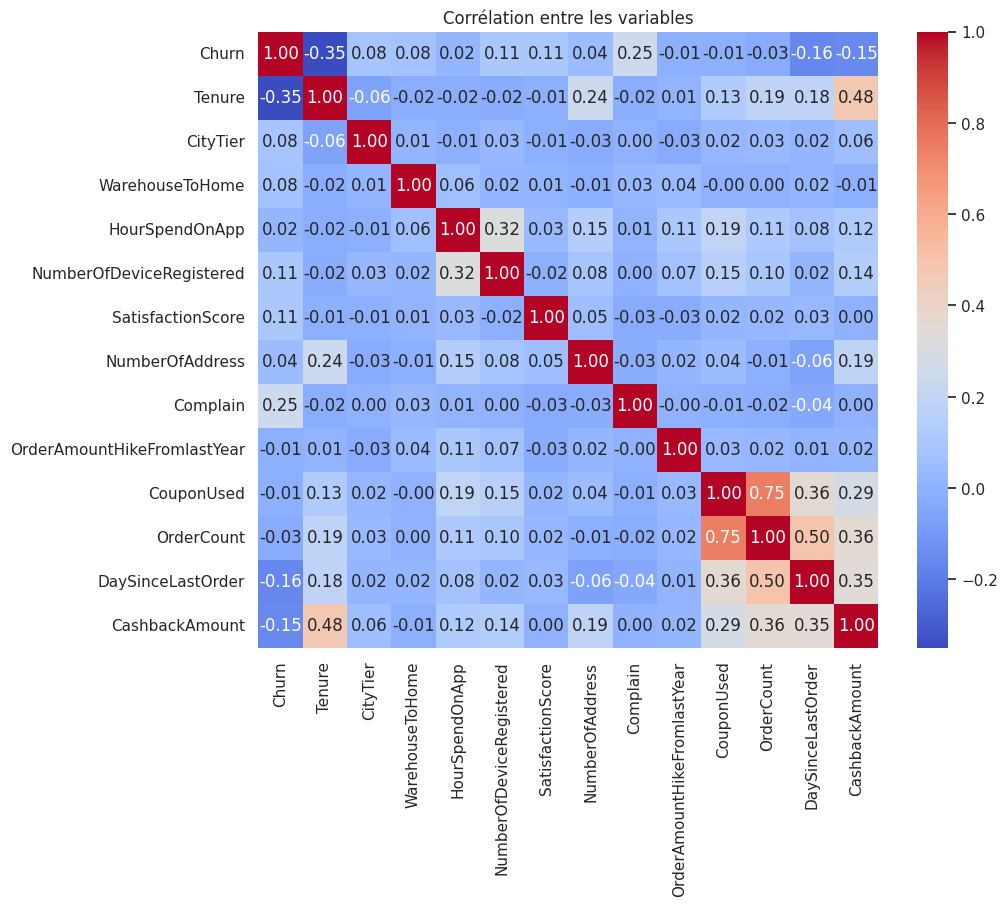

In [56]:

# Visualisation des corrélations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Corrélation entre les variables")
plt.show()

In [57]:
# Calculer la corrélation entre les variables numériques et la colonne 'Churn'
correlation_matrix = df.corr()
correlation_with_churn = correlation_matrix['Churn'].sort_values(ascending=False)

# Afficher la corrélation
print("Corrélation avec 'Churn':")
print(correlation_with_churn)


Corrélation avec 'Churn':
Churn                          1.000000
Complain                       0.250188
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
CityTier                       0.084703
WarehouseToHome                0.076630
NumberOfAddress                0.043931
HourSpendOnApp                 0.018675
CouponUsed                    -0.008264
OrderAmountHikeFromlastYear   -0.010058
OrderCount                    -0.028697
CashbackAmount                -0.154118
DaySinceLastOrder             -0.160757
Tenure                        -0.349408
Name: Churn, dtype: float64


<ipython-input-57-320cd805ba7a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


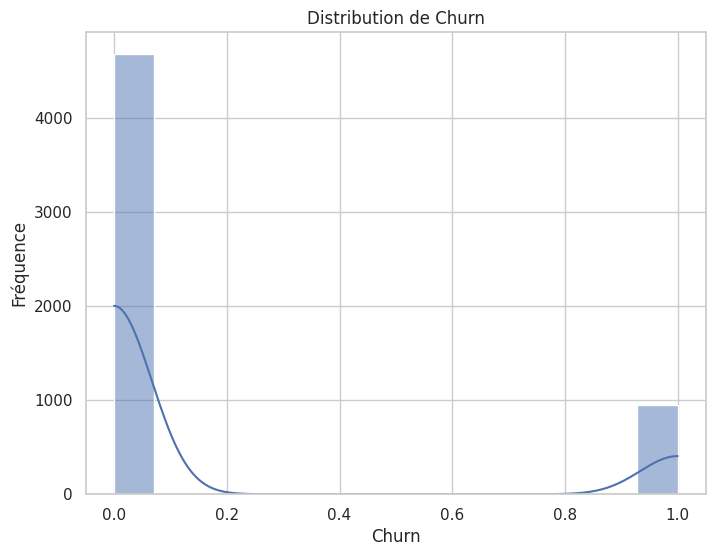

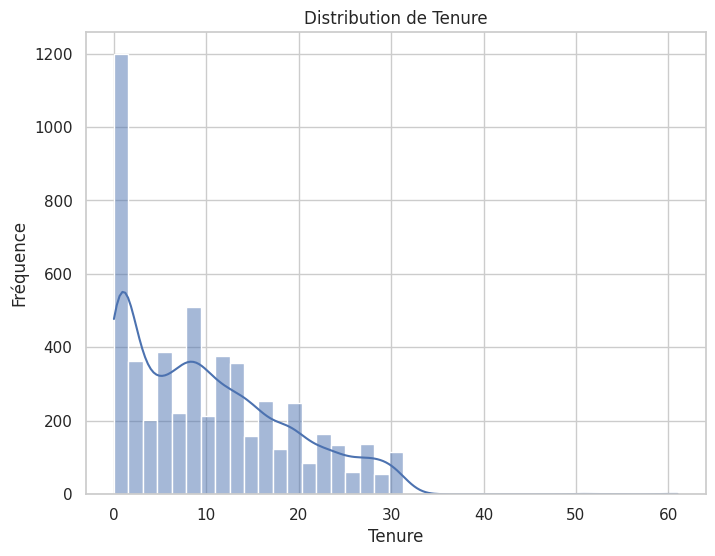

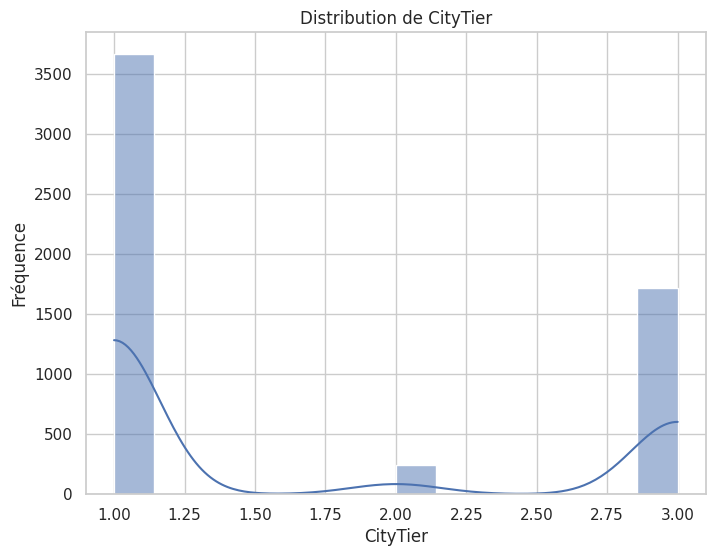

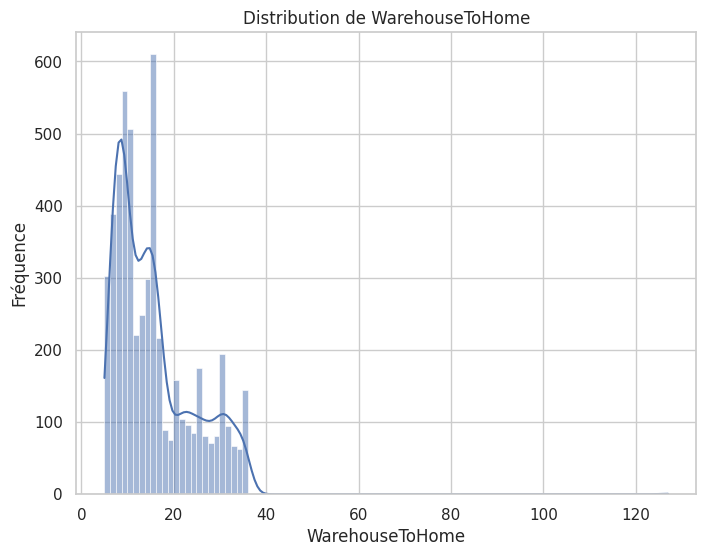

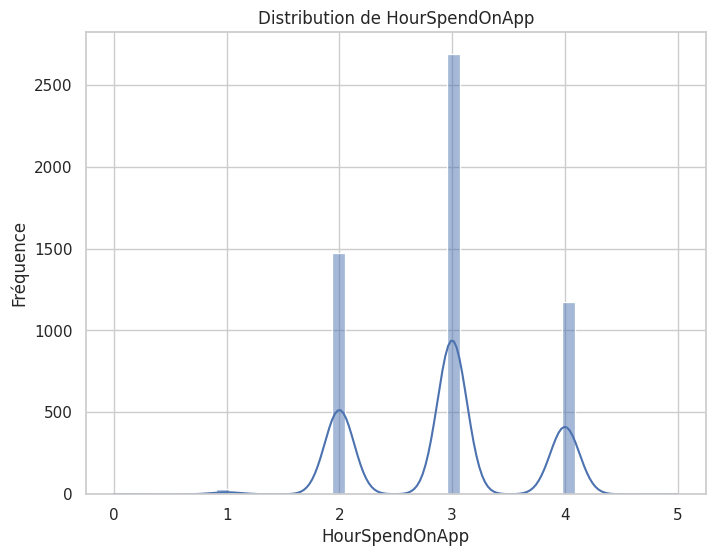

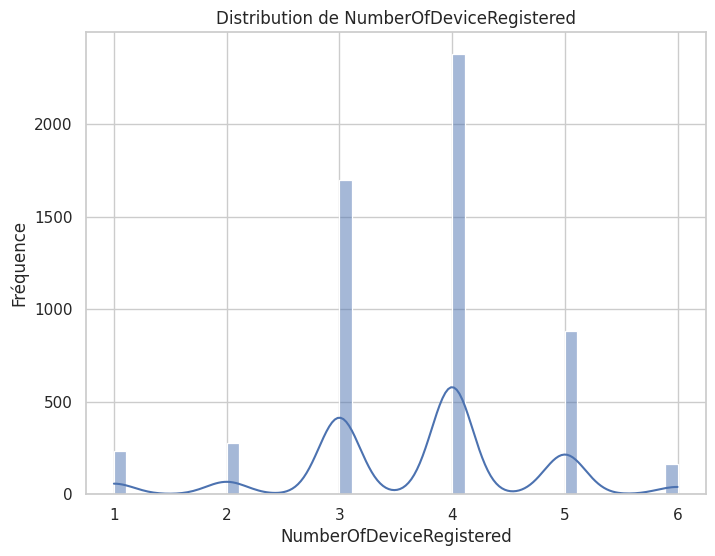

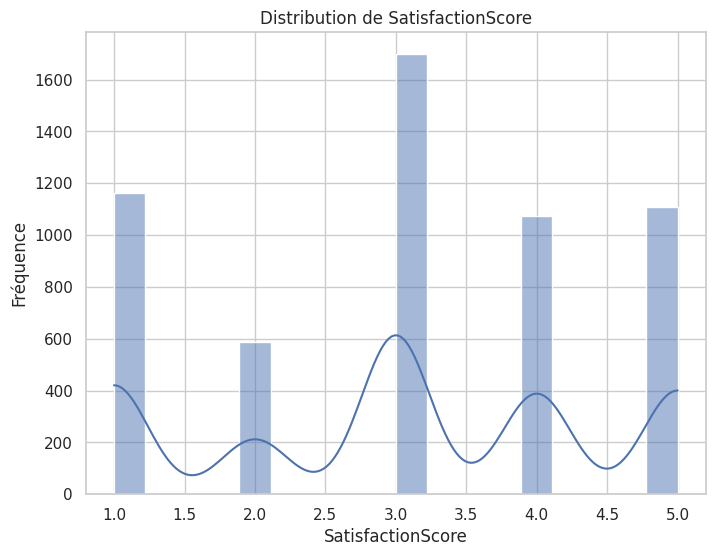

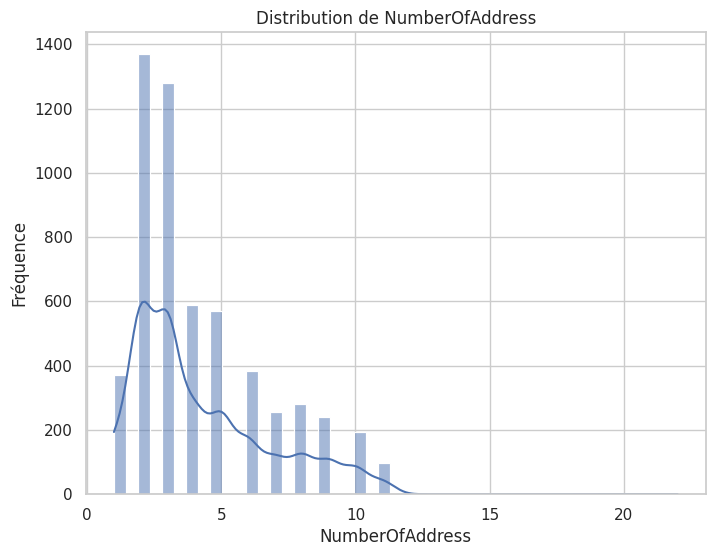

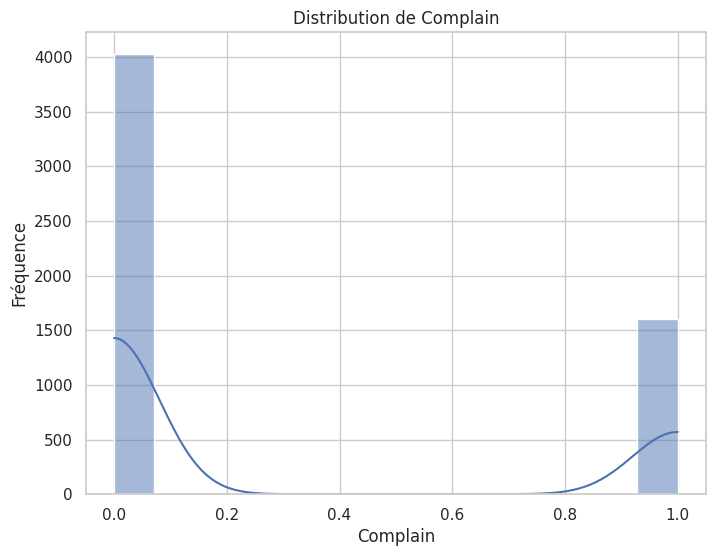

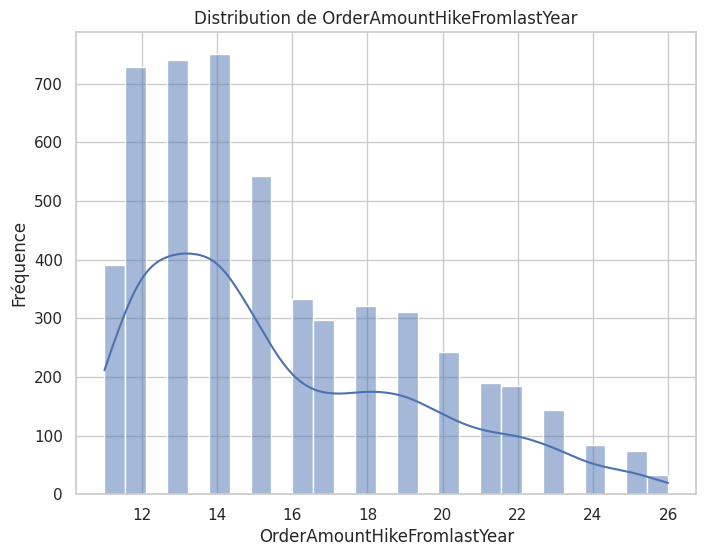

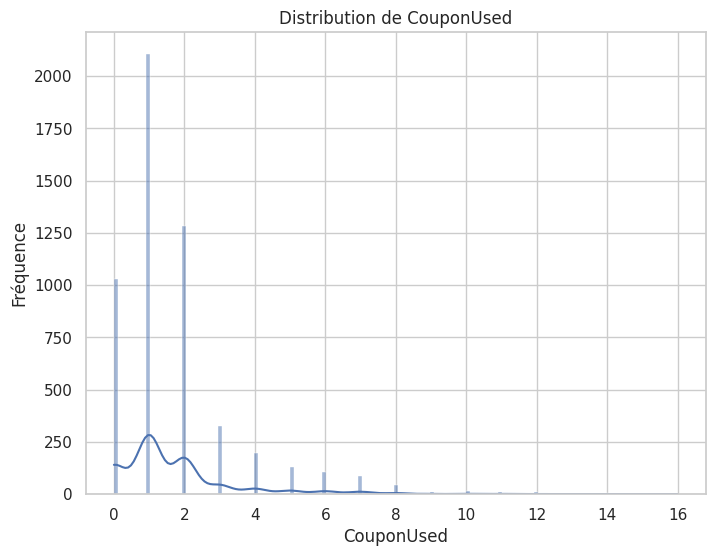

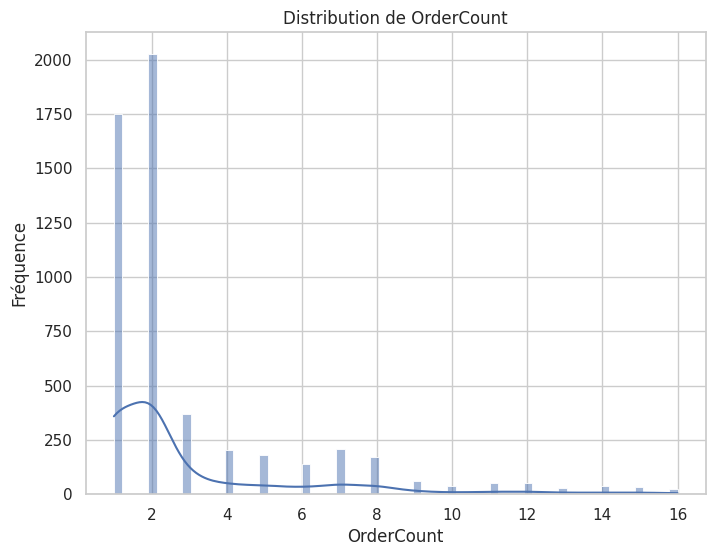

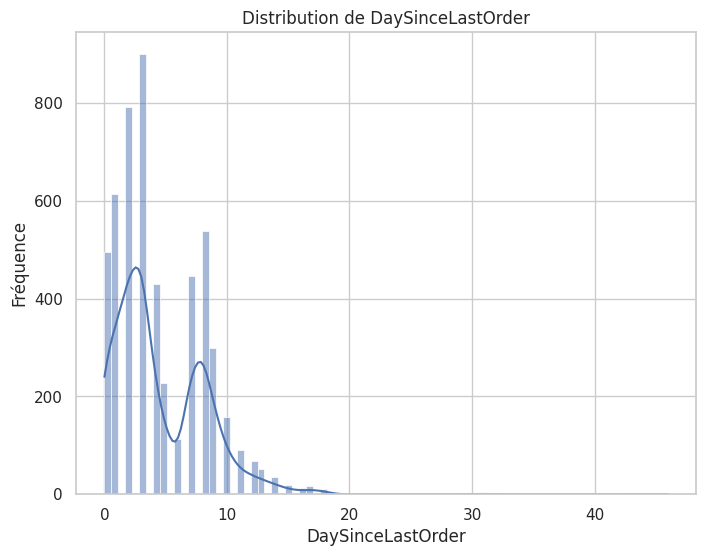

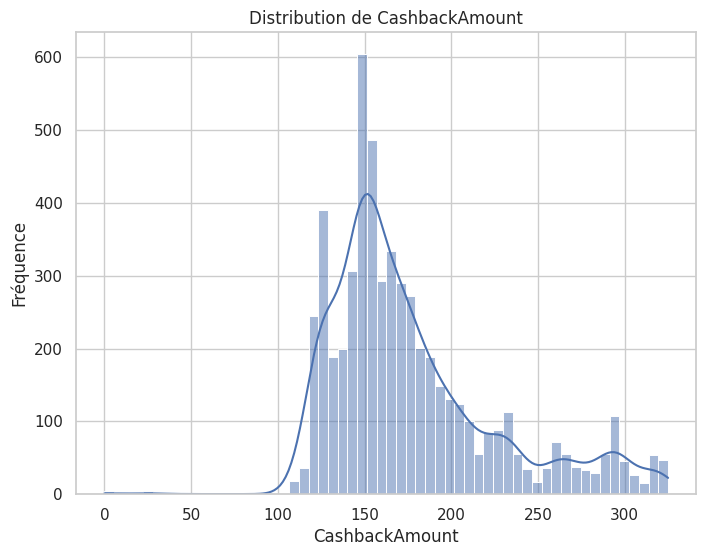

In [58]:
# Sélectionner les colonnes numériques
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Afficher des histogrammes pour les colonnes numériques
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.show()

Quelle situation familliale à le taux le plus élevé de churn ?

In [60]:

df.groupby('Churn')['MaritalStatus'].value_counts()

Churn  MaritalStatus
0      Married          2642
       Single           1316
       Divorced          724
1      Single            480
       Married           344
       Divorced          124
Name: MaritalStatus, dtype: int64

In [62]:
# Calculer le pourcentage de 'Single', 'Married' et 'Divorced' pour chaque groupe 'Churn'
result = df.groupby('Churn')['MaritalStatus'].value_counts(normalize=True) * 100

# Afficher les résultats
print(result)

Churn  MaritalStatus
0      Married          56.428877
       Single           28.107646
       Divorced         15.463477
1      Single           50.632911
       Married          36.286920
       Divorced         13.080169
Name: MaritalStatus, dtype: float64


In [63]:
# Traitement des valeurs manquantes
df['Tenure'].fillna(df['Tenure'].median(), inplace=True)
df['WarehouseToHome'].fillna(df['WarehouseToHome'].median(), inplace=True)
df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].median(), inplace=True)
df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].median(), inplace=True)
df['CouponUsed'].fillna(df['CouponUsed'].median(), inplace=True)
df['OrderCount'].fillna(df['OrderCount'].median(), inplace=True)
df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median(), inplace=True)

In [64]:
# Traitement des valeurs manquantes
df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median(), inplace=True)  # Remplacez par la médiane ou autre stratégie


In [66]:

# Affichage du dataframe après le nettoyage
print("DataFrame après le nettoyage :")
df.info()

DataFrame après le nettoyage :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5630 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5630 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5630 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [68]:
# Convertir les variables catégorielles en variables indicatrices
df = pd.get_dummies(df, columns=['MaritalStatus'], drop_first=True)

In [70]:
# Convertir les colonnes nécessaires en types de données appropriés
df['Tenure'] = pd.to_numeric(df['Tenure'], errors='coerce')
df['HourSpendOnApp'] = pd.to_numeric(df['HourSpendOnApp'], errors='coerce')
df['SatisfactionScore'] = pd.to_numeric(df['SatisfactionScore'], errors='coerce')

# Afficher la dataset nettoyée
print(df)

      Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0         1     4.0         Mobile Phone         3              6.0   
1         1     9.0                Phone         1              8.0   
2         1     9.0                Phone         1             30.0   
3         1     0.0                Phone         3             15.0   
4         1     0.0                Phone         1             12.0   
...     ...     ...                  ...       ...              ...   
5625      0    10.0             Computer         1             30.0   
5626      0    13.0         Mobile Phone         1             13.0   
5627      0     1.0         Mobile Phone         1             11.0   
5628      0    23.0             Computer         3              9.0   
5629      0     8.0         Mobile Phone         1             15.0   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0              Debit Card  Female             3.0                   

In [71]:

# Supprimer les lignes avec des valeurs manquantes pour permettre l'entraînement du modèle
df = df.dropna()

In [85]:
print(df.columns)


Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount',
       'MaritalStatus_Married', 'MaritalStatus_Single'],
      dtype='object')


In [87]:
# Convertir les variables catégorielles en variables indicatrices
df = pd.get_dummies(df, columns=['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat'], drop_first=True)


In [88]:
import numpy as np

In [89]:

# colonnes categoricales
data_cat = df[df.select_dtypes(exclude=np.number).columns]
data_cat

""
0
1
2
3
4
...
5625
5626
5627
5628


In [90]:
# correlation
corr_matrix = df.corr()
corr_matrix

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others
Churn,1.000000,-0.337831,0.084703,0.069544,0.018816,0.107939,0.105481,0.043931,0.250188,-0.007075,...,-0.064131,-0.032453,0.055751,0.004163,0.029264,-0.089575,-0.133353,0.113364,0.154387,-0.054903
Tenure,-0.337831,1.000000,-0.057895,-0.012191,-0.017282,-0.020657,-0.014452,0.235076,-0.020535,-0.005542,...,0.048243,0.019382,0.009659,-0.037254,-0.046389,0.348600,-0.053529,-0.169377,-0.233106,0.265067
CityTier,0.084703,-0.057895,1.000000,0.013576,-0.009921,0.027934,-0.011554,-0.029440,0.003375,-0.028890,...,-0.137236,-0.118713,0.514227,-0.030518,-0.025176,0.004160,0.226587,-0.127602,-0.188046,-0.042998
WarehouseToHome,0.069544,-0.012191,0.013576,1.000000,0.064069,0.023020,0.007524,-0.008305,0.026825,0.038311,...,0.025668,-0.025459,0.035711,-0.005679,-0.001261,0.033470,0.044414,-0.051364,-0.017583,-0.075069
HourSpendOnApp,0.018816,-0.017282,-0.009921,0.064069,1.000000,0.305048,0.030937,0.139541,0.006607,0.099305,...,0.042199,0.024180,0.003339,-0.025021,-0.017897,-0.044766,-0.038199,-0.175221,0.237925,-0.024705
NumberOfDeviceRegistered,0.107939,-0.020657,0.027934,0.023020,0.305048,1.000000,-0.017228,0.084997,0.003407,0.065714,...,0.040341,-0.007516,0.025578,0.007815,-0.021799,-0.035706,-0.006282,-0.215316,0.168584,0.021423
SatisfactionScore,0.105481,-0.014452,-0.011554,0.007524,0.030937,-0.017228,1.000000,0.053583,-0.031115,-0.027121,...,0.020594,-0.050365,0.017752,0.008063,-0.035220,0.002287,-0.019501,0.005493,0.005577,0.001442
NumberOfAddress,0.043931,0.235076,-0.029440,-0.008305,0.139541,0.084997,0.053583,1.000000,-0.026399,0.012161,...,0.052826,-0.002274,-0.017738,0.004844,-0.031492,0.071772,0.044615,-0.149388,-0.032732,0.049921
Complain,0.250188,-0.020535,0.003375,0.026825,0.006607,0.003407,-0.031115,-0.026399,1.000000,-0.003842,...,-0.003238,-0.009009,0.011450,0.021183,-0.040269,0.013917,-0.021304,0.006186,0.011191,-0.013429
OrderAmountHikeFromlastYear,-0.007075,-0.005542,-0.028890,0.038311,0.099305,0.065714,-0.027121,0.012161,-0.003842,1.000000,...,0.046249,0.010755,-0.034468,0.006769,-0.001702,-0.014579,-0.004927,-0.043680,0.067747,-0.051031


In [91]:
plt.figure(figsize=(12,12))
sns.heatmap(df_dummies.corr(), cmap="Paired")

NameError: ignored

<Figure size 1200x1200 with 0 Axes>

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [93]:
# Séparer les features (X) et la variable cible (y)
X = df.drop(['Churn'], axis=1)
y = df['Churn']

# Diviser le dataset en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardiser les features, si nécessaire (par exemple, pour les modèles basés sur les distances comme SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialiser les modèles
random_forest = RandomForestClassifier(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)
mlp_classifier = MLPClassifier(random_state=42)

# Liste des modèles à tester
models = [random_forest, gradient_boosting, mlp_classifier]

# Entraîner et évaluer chaque modèle
for model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    print(f"Model: {type(model).__name__}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(classification_rep)
    print("="*50)

Model: RandomForestClassifier
Accuracy: 0.9715808170515098
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       941
           1       0.99      0.84      0.91       185

    accuracy                           0.97      1126
   macro avg       0.98      0.92      0.94      1126
weighted avg       0.97      0.97      0.97      1126

Model: GradientBoostingClassifier
Accuracy: 0.9236234458259325
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       941
           1       0.86      0.64      0.73       185

    accuracy                           0.92      1126
   macro avg       0.89      0.81      0.84      1126
weighted avg       0.92      0.92      0.92      1126

Model: MLPClassifier
Accuracy: 0.9591474245115453
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (Précision) : le rapport du nombre de prédictions correctes sur le nombre total de prédictions.

In [95]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9591474245115453